<a href="https://colab.research.google.com/github/muntherqasaimeh/SpamsAnalysis/blob/main/Spamsanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk as nltk

In [2]:
SMS_SH_df = pd.read_csv("/content/sample_data/SMSSpamCollection.csv",sep='\t', header=None)
SMS_SH_df.columns=['Label','body_text']
SMS_SH_df.head()

,Label,body_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
SMS_SH_df.shape
#to get information about number of rows and columns 

(5572, 2)

In [4]:
SMS_SH_df.info()
# to get info about number of null values and datatype 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Label      5572 non-null   object
 1   body_text  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
SMS_SH_df.Label.value_counts()
#to get info about the number of elements inside each label 

ham     4825
spam     747
Name: Label, dtype: int64

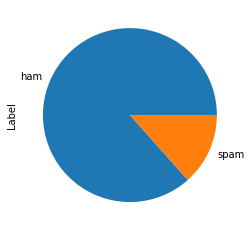

In [6]:
SMS_SH_df.Label.value_counts(normalize=True).plot.pie()
plt.show()
#to get piechart for label values

In [7]:
SMS_SH_df.isnull().value_counts()
#to get number of nulls in the file(all values is false so no null values)

Label  body_text
False  False        5572
dtype: int64

In [8]:
df=SMS_SH_df.copy()
##we have to work on a copy from the orginal file because we will need the orginal back at the end of coding (in natural language generating)

In [9]:
import string
string.punctuation
#we have to delete all punctuations from the text as a first step in text manipulation 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
##as a test code let us try on a example statement to delete punctuation from 
# define punctuation
punct= string.punctuation
text='Hello!!!, I love NLP, will use python in our code.'

no_punct = ""
for char in text:
   if char not in punct:
       no_punct = no_punct + char

# display the unpunctuated string
print(no_punct)
##here we find that the code runs completely and print the statement without punctuations so we have to try it on our file 

Hello I love NLP will use python in our code


In [11]:
#list comprhansion 
#lambda function
#adding join to join chars into words 
def remove_punct(text):
    
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct
    ## here we make a new list called text_nopunct by joining every char on the text not belongs to string.punctuation
df['body_text_nopunc'] = df['body_text'].apply(lambda x: remove_punct(x)) ##generate new column from the old one by calling the lambda function 
 ##the function will print a new column the body text without punctions 
df.head()

,Label,body_text,body_text_nopunc
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


In [12]:
#python senstive case , so to take the text which is the same semantic (meaning) we have to convert all text to lower case or upper case 
#add lower to teh remove_punc function

#list comprhansion 
#lambda function
#adding join to join chars into words 
def remove_punct(text):
    
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

df['body_text_nopunc'] = df['body_text'].apply(lambda x: remove_punct(x.lower()))

df.head()

,Label,body_text,body_text_nopunc
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [13]:
## tokinazation
##tokenzation operation is splitting the text (statement) into tokenz each token is a word on the text (statement)
from nltk.tokenize import word_tokenize
#import nltk
nltk.download('punkt')   ##download package for tokenz

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
import re
#\W+ regex, indicates that it will split wherever it sees one or more non-word characters.
#So that'll split on white spaces, special characters, anything like that.

text='I love NLP,will use python in our code.'
tokens = re.split('\W+', text)
tokens

['I', 'love', 'NLP', 'will', 'use', 'python', 'in', 'our', 'code', '']

In [15]:
## tokinazation on our text
def tokenize(text):
    tokens = word_tokenize(text)
    return tokens
df['body_text_tokenized'] = df['body_text_nopunc'].apply(lambda x: tokenize(x))

df.head()

,Label,body_text,body_text_nopunc,body_text_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [16]:
## removing stopwords
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')  ##this for download stopwords package from nltk

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
stopwords_En = nltk.corpus.stopwords.words('english')


In [19]:
stopwords_En  ## to print stopwords inside the package 

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
## let us try on our text 
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords_En]
    return text

df['body_text_nostop'] = df['body_text_tokenized'].apply(lambda x: remove_stopwords(x))

df.head()

,Label,body_text,body_text_nopunc,body_text_tokenized,body_text_nostop
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


In [21]:
## removing stopwords on arabic 
stopwords_Ar = nltk.corpus.stopwords.words('arabic')
stopwords_Ar

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [22]:
## delete puncts and make tokenz and remove stopwords all in one example 
text_Ar='إن يوماً باقياً من العمر ... هو للمؤمن عمر ما ينبغى أن يستهان به'
text_Arـnopunct = "".join([char for char in text_Ar if char not in string.punctuation])
print('text_Arـnopunct:',text_Arـnopunct)
text_Ar_tokens = word_tokenize(text_Arـnopunct)
print('text_Ar_tokens:',text_Ar_tokens)
text_Ar_nostop = [word for word in text_Ar_tokens if word not in stopwords_Ar]
print('text_Ar_nostop:',text_Ar_nostop)


text_Arـnopunct: إن يوماً باقياً من العمر  هو للمؤمن عمر ما ينبغى أن يستهان به
text_Ar_tokens: ['إن', 'يوماً', 'باقياً', 'من', 'العمر', 'هو', 'للمؤمن', 'عمر', 'ما', 'ينبغى', 'أن', 'يستهان', 'به']
text_Ar_nostop: ['يوماً', 'باقياً', 'العمر', 'للمؤمن', 'عمر', 'ينبغى', 'يستهان']


In [23]:
## now we have to lematizing to asign every token to the root word to have common words 
## first we need to import packages because lematizing working by using dictionary which semanting using algorithm without any dict
## but the lematizing is more accurate with sematic and context to get out common words 
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [24]:
import nltk

wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

In [25]:
## lematizing with outside example 
print(wn.lemmatize('universal'))
print(wn.lemmatize('university'))
print(wn.lemmatize('universe'))

universal
university
universe


In [26]:
## let us use it on our text 
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

df['body_text_lemmatized'] = df['body_text_nostop'].apply(lambda x: lemmatizing(x))

df.head(5)

,Label,body_text,body_text_nopunc,body_text_tokenized,body_text_nostop,body_text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, go, usf, life, around, though]"


In [28]:
## here we have a standard code to Create function to remove punctuation, tokenize, remove stopwords, and stem all in one 
### Create function to remove punctuation, tokenize, remove stopwords, and stem

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
     #tokens = re.split('\W+', text)
    tokens = word_tokenize(text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords_En])
    return text
df=df[['Label','body_text']]
df['cleaned_text'] = df['body_text'].apply(lambda x: clean_text(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [29]:
df.shape

(5572, 3)

In [30]:
df.head()

,Label,body_text,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


In [32]:
### vectorization by tfidvectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
#tfidf = TfidfVectorizer(min_df=1)
tfidf = TfidfVectorizer( ngram_range=(1,1))
features_tfidf = tfidf.fit_transform(df['cleaned_text'])
print(features_tfidf.shape)
print('Sparse Matrix :\n', features_tfidf)
features_tfidf = pd.DataFrame(features_tfidf.toarray())
features_tfidf.columns = tfidf.get_feature_names()
features_tfidf

(5572, 8092)
Sparse Matrix :
   (0, 7644)	0.19455055929986295
  (0, 1146)	0.3502103023764149
  (0, 3366)	0.1625113243443846
  (0, 2015)	0.2958590786430112
  (0, 1737)	0.33431358850024145
  (0, 4238)	0.2958590786430112
  (0, 7848)	0.23799450982015485
  (0, 3403)	0.19492218407727954
  (0, 1739)	0.2958590786430112
  (0, 1335)	0.26630661054973115
  (0, 2233)	0.27121377181119205
  (0, 5583)	0.23913099868302934
  (0, 4094)	0.3502103023764149
  (0, 3314)	0.1406644195549338
  (1, 5241)	0.5633498837724461
  (1, 7760)	0.44483654514496557
  (1, 4060)	0.4773478663822099
  (1, 4273)	0.42081977871680865
  (1, 5211)	0.2825014776211812
  (2, 71)	0.23441520469862814
  (2, 1218)	0.16767473394527968
  (2, 5866)	0.23441520469862814
  (2, 7342)	0.12408474860231786
  (2, 5820)	0.23441520469862814
  (2, 5908)	0.16121883187604838
  :	:
  (5568, 2812)	0.6620790748934324
  (5568, 3117)	0.5770406346252941
  (5568, 3662)	0.3753220393700477
  (5568, 3314)	0.2963254483546816
  (5569, 6520)	0.5375461940984255
  (556

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
## but we still without doing feature engineering level so we have to start feature engineer phase before vectorization 
## feature enginner is operation differ from one problem to another here we are solving spaming so we should take hypothisis for spam message
## first hypo that spam messages have length more than orginal , and with more punctions, and almost spams have more capital letters 

## Create feature for the message length
df['body_len'] = df['body_text'].apply(lambda x: len(x)-x.count(' ') )
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Label,body_text,cleaned_text,body_len
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,92
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,24
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,128
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,39
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though,49


In [34]:
## Create feature for percent of text that is punctuation
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round( count/(len(text) - text.count(" ")),3)*100

df['body_len'] = df['body_text'].apply(lambda x: len(x) - x.count(" "))
df['punct%'] = df['body_text'].apply(lambda x: count_punct(x))
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Label,body_text,cleaned_text,body_len,punct%
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,92,9.8
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,128,4.7
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,39,15.4
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though,49,4.1


In [35]:
## for capitals 
## Create feature for The percent of characters in capital letters
import string

def count_Cap(text):
    count = sum([1 for char in text if char.isupper()])
    return round( count/(len(text) - text.count(" ")),3)*100

df['body_len'] = df['body_text'].apply(lambda x: len(x) - x.count(" "))
df['cap%'] = df['body_text'].apply(lambda x: count_Cap(x))
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Label,body_text,cleaned_text,body_len,punct%,cap%
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,92,9.8,3.3
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,24,25.0,8.3
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,128,4.7,7.8
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,39,15.4,5.1
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though,49,4.1,4.1


In [36]:
## here we should see description about three features which we added
df.describe()

,body_len,punct%,cap%
count,5572.000000,5572.000000,5572.000000
mean,65.780510,7.102872,7.947577
std,48.813252,6.633766,13.308903
min,2.000000,0.000000,0.000000
25%,29.000000,3.300000,3.100000
50%,50.000000,5.500000,4.500000
75%,99.250000,9.100000,7.400000
max,740.000000,100.000000,100.000000


In [37]:
## Rescaling the Features : its process to have a fixed scale for features one of these techniques is minmax scaler to make values between 0 and 1 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [38]:
num_vars = ['body_len','punct%','cap%']
df[num_vars] = scaler.fit_transform(df[num_vars])

In [39]:
df.head()

,Label,body_text,cleaned_text,body_len,punct%,cap%
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,0.121951,0.098,0.033
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,0.029810,0.250,0.083
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...,0.170732,0.047,0.078
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,0.050136,0.154,0.051
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though,0.063686,0.041,0.041


In [40]:
features_tfidf.shape  ##fit the new features with TFIDvectorization

(5572, 8092)

In [41]:
df.shape

(5572, 6)

In [43]:
X = pd.concat([df['body_len'], df['punct%'],df['cap%'], pd.DataFrame(features_tfidf)], axis=1)
X.head()
## implement TFIDvector to the data with new features added 

,body_len,punct%,cap%,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,...,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll,〨ud
0,0.121951,0.098,0.033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.029810,0.250,0.083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.170732,0.047,0.078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.050136,0.154,0.051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.063686,0.041,0.041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
## using ML algorithms Randomforest 
from sklearn.ensemble import RandomForestClassifier
#print(dir(RandomForestClassifier))
#print(RandomForestClassifier())
from sklearn.model_selection import KFold, cross_val_score
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X, df['Label'], cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.97847534, 0.97757848, 0.97845601, 0.96499102, 0.97576302])